### SRI NADHILA - 09011181924153 - SK5B
<h5> <span style="color:blue"> Sumber Github: https://github.com/VickneshB/RubiksCube </h5> 

<center><h2> PENYELESAIAN TEKA - TEKI KUBUS RUBIK MENGGUNAKAN </h2></center>
<center><h2> OPEN SOURCE COMPUTER VISION LIBRARY  </h2></center>

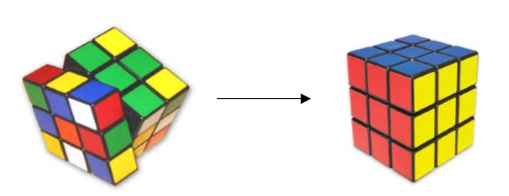

## KUBUS
<p style='text-align: justify;'> <b> Kubus rubik </b> merupakan sebuah permainan teka-teki kombinatorial yang memiliki dimensi yang beragam mulai dari 3x3, 4x4 dan seterusnya. Permainan ini memiliki tujuan utama yaitu untuk menyusun warna-warna yang sama dari tiap sisinya. Penyelesaian kubus rubik pada umumnya dilakukan oleh manusia atau pemain itu sendiri. Namun kemajuan zaman dan perkembangan teknologi khususnya teknologi <b> kecerdasan buatan </b> memungkinkan penyelesaian kubus rubik dilakukan oleh bantuan mesin. Dalam hal ini menggunakan bantuan perangkat lunak yang telah ditanamkan kecerdasan buatan. Sehingga proses penyelesaian rubik akan menjadi lebih cepat Pada projek ini akan digunakan <b> open source computer vision (OpenCV) library sebagai kecerdasan buatan yang telah berbentuk library dan bersifat terbuka atau dapat diakses oleh semua orang. </b> </p>

## Tujuan Projek
<p style='text-align: justify;'> Dalam projek ini di rancang dan mengimplementasikan sistem yang berkaitan dengan deteksi dan pelokalan objek. Lebih khusus lagi, mencoba untuk menangkap gambar masing-masing wajahnya Kubus melalui webcam dan mengekstrak warna stiker menggunakan teknik Computer Vision dengan bantuan minimal dari pengguna, sehingga membuat interaksi pengguna dengan mesin lebih alami. Sistem kemudian mencoba memberikan solusi untuk masalah tersebut dengan menerapkan algoritma pemecahan kubus Rubik dan menampilkan langkah-langkah kepada pengguna dalam format animasi untuk pemahaman pengguna yang lebih baik. </p>

## OpenCV

<p style='text-align: justify;'> <b>(Open Source Computer Vision Library), </b> adalah sebuah library open source yang dikembangkan oleh intel  yang fokus untuk menyederhanakan programing terkait citra digital. Di dalam OpenCV sudah mempunyai banyak fitur, antara lain : pengenalan wajah, pelacakan wajah, deteksi wajah, Kalman filtering, dan berbagai jenis metode AI (Artificial Intellegence). Dan menyediakan berbagai algoritma sederhana terkait Computer Vision untuk low level A. Hasil penelitian terbukti bahwa penyelesaian tekateki kubus rubik dapat diselesaikan secara cepat dan efisien meski dilakukan oleh pemain yang belum pernah melakukan permainan ini sekalipun. </p>

## Tujuan Open CV
<p style='text-align: justify;'> Komputer Vision adalah bidang yang berkaitan dengan pemrosesan otomatis gambar dari dunia nyata untuk mengekstrak dan menafsirkan informasi secara real time. <b> Tujuan dari Komputer Vision </b> adalah untuk memproses gambar yang diperoleh dengan kamera untuk menghasilkan representasi objek di dunia untuk menyelesaikan beberapa tugas, atau mungkin "memahami" pemandangan dalam arti luas atau terbatas. </p>

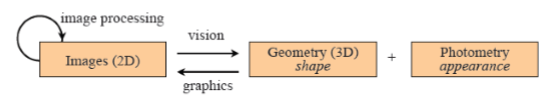

## Beberapa isu penting tentang Komputer Vision
<p style='text-align: justify;'> <b>1. Noise dan distorsi </b> disebabkan oleh variasi di dunia (cuaca, kilat, pantulan, gerakan, cahaya), ketidaksempurnaan pada lensa dan pengaturan mekanis, waktu integrasi terbatas pada sensor (motion blur), gangguan listrik pada sensor atau elektronik lainnya, dan artefak kompresi setelah pengambilan gambar. Kebisingan biasanya ditangani dengan menggunakan metode statistik. </p>

<p style='text-align: justify;'> <b>2. Segmentasi </b> mengacu pada proses mempartisi gambar digital menjadi beberapa segmen (kumpulan piksel, juga dikenal sebagai superpiksel). Tujuan dari segmentasi adalah untuk menyederhanakan dan/atau mengubah representasi suatu citra menjadi sesuatu yang lebih bermakna dan lebih mudah untuk dianalisis. Segmentasi citra biasanya digunakan untuk menemukan objek dan batas (garis, kurva, dll.) dalam citra. Lebih tepatnya, segmentasi gambar adalah proses pemberian label ke setiap piksel dalam gambar sedemikian rupa sehingga piksel dengan label yang sama memiliki karakteristik visual tertentu. Thresholding, clustering, metode berbasis kompresi, dan metode berbasis histogram adalah beberapa teknik yang digunakan untuk segmentasi. </p>

<p style='text-align: justify;'> <b>3. Deteksi objek </b> Jika kita diberi gambar untuk dianalisis, kita akan mencoba menerapkan algoritma pengenalan ke setiap sub-jendela dalam gambar ini. Algoritma semacam itu cenderung lambat dan rawan kesalahan. Sebaliknya, lebih efektif untuk membangun tujuan khusus detektor yang tugasnya adalah dengan cepat menemukan kemungkinan daerah di mana objek tertentu mungkin terjadi. Bagaimana input, output, dan informasi antara direpresentasikan dan algoritma mana yang digunakan untuk menghitung hasil yang diinginkan juga merupakan faktor penting yang harus dipertimbangkan </p>

### Bagian pertama dari aplikasi melibatkan identifikasi konfigurasi kubus. Proses berikut ikut bermain:
<p style='text-align: justify;'> <b> 1. Input: </b> yang diterima dari sensor (webcam) berupa frame gambar. Enam bingkai berisi gambar yang menunjukkan 6 wajah kubus. </p>
<p style='text-align: justify;'> <b> 2. Smoothing: </b> ini diterapkan pada setiap frame untuk mengurangi noise. </p>
<p style='text-align: justify;'> <b> 3. Deteksi tepi: </b> deteksi tepi cerdik digunakan untuk mendeteksi semua tepi dan kontur kuat pada gambar </p>
<p style='text-align: justify;'> <b> 4. Deteksi Persegi: </b> perkiraan kontur ke poligon dan menyaring hanya poligon-poligon yang bisa berbentuk bujur sangkar pada gambar </p>
<p style='text-align: justify;'> <b> 5. Identifikasi Warna: </b> warna setiap kotak diidentifikasi , dan dikelompokkan enam kelompok berdasarkan rona warnanya. </p>

## Kodingan

In [ ]:
import cv2
import sys
import time
import math
import numpy as np
import random as rng
from scipy import stats
import kociemba
from datetime import datetime

import rotate

def concat(up_face,right_face,front_face,down_face,left_face,back_face):
    # solution = [up_face,right_face,front_face,down_face,left_face,back_face]
    solution = np.concatenate((up_face, right_face), axis=None)
    solution = np.concatenate((solution, front_face), axis=None)
    solution = np.concatenate((solution, down_face), axis=None)
    solution = np.concatenate((solution, left_face), axis=None)
    solution = np.concatenate((solution, back_face), axis=None)
    # print(solution)
    return solution

def detect_face(bgr_image_input):

    gray = cv2.cvtColor(bgr_image_input,cv2.COLOR_BGR2GRAY)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    gray = cv2.adaptiveThreshold(gray,20,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,0)
    #cv2.imwrite()
    try:
         _, contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    except:
         contours, hierarchy = cv2.findContours(gray,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)


    i = 0
    contour_id = 0
    #print(len(contours))
    count = 0
    blob_colors = []
    for contour in contours:
        A1 = cv2.contourArea(contour)
        contour_id = contour_id + 1

        if A1 < 3000 and A1 > 1000:
            perimeter = cv2.arcLength(contour, True)
            epsilon = 0.01 * perimeter
            approx = cv2.approxPolyDP(contour, epsilon, True)
            hull = cv2.convexHull(contour)
            if cv2.norm(((perimeter / 4) * (perimeter / 4)) - A1) < 150:
                #if cv2.ma
                count = count + 1
                x, y, w, h = cv2.boundingRect(contour)
                #cv2.rectangle(bgr_image_input, (x, y), (x + w, y + h), (0, 255, 255), 2)
                #cv2.imshow('cutted contour', bgr_image_input[y:y + h, x:x + w])
                val = (50*y) + (10*x)
                blob_color = np.array(cv2.mean(bgr_image_input[y:y+h,x:x+w])).astype(int)
                cv2.drawContours(bgr_image_input,[contour],0,(255, 255, 0),2)
                cv2.drawContours(bgr_image_input, [approx], 0, (255, 255, 0), 2)
                blob_color = np.append(blob_color, val)
                blob_color = np.append(blob_color, x)
                blob_color = np.append(blob_color, y)
                blob_color = np.append(blob_color, w)
                blob_color = np.append(blob_color, h)
                blob_colors.append(blob_color)
    if len(blob_colors) > 0:
        blob_colors = np.asarray(blob_colors)
        blob_colors = blob_colors[blob_colors[:, 4].argsort()]
    face = np.array([0,0,0,0,0,0,0,0,0])
    if len(blob_colors) == 9:
        #print(blob_colors)
        for i in range(9):
            #print(blob_colors[i])
            if blob_colors[i][0] > 120 and blob_colors[i][1] > 120 and blob_colors[i][2] > 100:
                blob_colors[i][3] = 1
                face[i] = 1
            elif blob_colors[i][0] < 100 and blob_colors[i][1] > 120 and blob_colors[i][2] > 120 and np.abs(blob_colors[i][1]-blob_colors[i][2])<30:
                blob_colors[i][3] = 2
                face[i] = 2
            elif blob_colors[i][0] > blob_colors[i][1] and blob_colors[i][1] > blob_colors[i][2]:
                blob_colors[i][3] = 3
                face[i] = 3
            elif blob_colors[i][1] > blob_colors[i][0] and blob_colors[i][1] > blob_colors[i][2] and np.abs(blob_colors[i][0] - blob_colors[i][2]) < 30:
                blob_colors[i][3] = 4
                face[i] = 4
            elif blob_colors[i][2] > blob_colors[i][0] and blob_colors[i][2] > blob_colors[i][1] and np.abs(blob_colors[i][0] - blob_colors[i][1]) < 30 and blob_colors[i][0] < 80:
                blob_colors[i][3] = 5
                face[i] = 5
            elif blob_colors[i][1] < blob_colors[i][2] and blob_colors[i][0] < blob_colors[i][1] and blob_colors[i][2] > 120:
                blob_colors[i][3] = 6
                face[i] = 6
        #print(face)
        if np.count_nonzero(face) == 9:
            #print(face)
            #print (blob_colors)
            return face, blob_colors
        else:
            return [0,0], blob_colors
    else:
        return [0,0,0], blob_colors
        #break

def find_face(video,videoWriter,uf,rf,ff,df,lf,bf,text = ""):
    faces = []
    while True:
        is_ok, bgr_image_input = video.read()

        if not is_ok:
            print("Cannot read video source")
            sys.exit()


        face, blob_colors = detect_face(bgr_image_input)
        bgr_image_input = cv2.putText(bgr_image_input, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
        # print(len(face))
        if len(face) == 9:
            faces.append(face)
            if len(faces) == 5:
                face_array = np.array(faces)
                # print('INNNNN')
                # face_array = np.transpose(face_array)
                detected_face = stats.mode(face_array)[0]
                # print(final_face)
                uf = np.asarray(uf)
                ff = np.asarray(ff)
                detected_face = np.asarray(detected_face)
                #print(np.array_equal(detected_face, tf))
                #print(np.array_equal(detected_face, ff))
                faces = []
                if np.array_equal(detected_face, uf) == False and np.array_equal(detected_face, ff) == False and np.array_equal(detected_face, bf) == False and np.array_equal(detected_face, df) == False and np.array_equal(detected_face, lf) == False and np.array_equal(detected_face, rf) == False:
                    return detected_face
        videoWriter.write(bgr_image_input)
        cv2.imshow("Output Image", bgr_image_input)
        key_pressed = cv2.waitKey(1) & 0xFF
        if key_pressed == 27 or key_pressed == ord('q'):
            break


def main():
    up_face = [0, 0]
    front_face = [0, 0]
    left_face = [0, 0]
    right_face = [0, 0]
    down_face = [0, 0]
    back_face = [0, 0]
    video = cv2.VideoCapture(0)
    is_ok, bgr_image_input = video.read()
    broke = 0
    

    if not is_ok:
        print("Cannot read video source")
        sys.exit()

    h1 = bgr_image_input.shape[0]
    w1 = bgr_image_input.shape[1]
    faces = []
    
    try:
        fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
        fname = "OUTPUT5.avi"
        fps = 20.0
        videoWriter = cv2.VideoWriter(fname, fourcc, fps, (w1, h1))
    except:
        print("Error: can't create output video: %s" % fname)
        sys.exit()
    
    while True:
        is_ok, bgr_image_input = video.read()
        if not is_ok:
            break
        while True:
            #print("Show Front Face")
            front_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Front Face")
            mf = front_face[0,4]
            print(front_face)
            print(mf)
            #print("Show Up Face")
            #time.sleep(2)
            up_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Top Face")
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 3:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "Show Down Face", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            mu = up_face[0, 4]
            print(up_face)
            print(mu)
            #print("Show Down Face")
            #time.sleep(2)
            down_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Down Face")
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 3:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "Show Right Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            md = down_face[0, 4]
            print(down_face)
            print(md)
            #print("Show Right Face")
            #time.sleep(2)
            right_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Right Face")
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 3:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "Show Left Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            mr = right_face[0, 4]
            print(right_face)
            print(mr)
            #print("Show Left Face")
            #time.sleep(2)
            left_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Left Face")
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 3:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "Show Back Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            ml = left_face[0, 4]
            print(left_face)
            print(ml)
            #print("Show Back Face")
            #time.sleep(2)
            back_face = find_face(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face, text="Show Back Face")
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 3:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "Show Front Face", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            mb = back_face[0, 4]
            print(back_face)
            #time.sleep(2)
            print(mb)

            solution = concat(up_face,right_face,front_face,down_face,left_face,back_face)
            #print(solution)
            cube_solved = [mu, mu, mu, mu, mu, mu, mu, mu, mu, mr, mr, mr, mr, mr, mr, mr, mr, mr, mf, mf, mf, mf, mf,
                           mf, mf, mf, mf, md, md, md, md, md, md, md, md, md, ml, ml, ml, ml, ml, ml, ml, ml, ml, mb,
                           mb, mb, mb, mb, mb, mb, mb, mb]
            if (concat(up_face, right_face, front_face, down_face, left_face, back_face) == cube_solved).all():
                # print("CUBE IS SOLVED")
                is_ok, bgr_image_input = video.read()
                bgr_image_input = cv2.putText(bgr_image_input, "CUBE ALREADY SOLVED", (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
                videoWriter.write(bgr_image_input)
                cv2.imshow("Output Image", bgr_image_input)
                key_pressed = cv2.waitKey(1) & 0xFF
                if key_pressed == 27 or key_pressed == ord('q'):
                    break
                time.sleep(5)
                break

            final_str = ''
            for val in range(len(solution)):
                if solution[val] == mf:
                    final_str = final_str + 'F'
                elif solution[val] == mr:
                    final_str = final_str + 'R'
                elif solution[val] == mb:
                    final_str = final_str + 'B'
                elif solution[val] == ml:
                    final_str = final_str + 'L'
                elif solution[val] == mu:
                    final_str = final_str + 'U'
                elif solution[val] == md:
                    final_str = final_str + 'D'

            print(final_str)
            try:
                solved = kociemba.solve(final_str)
                print(solved)
                break
            except:
                up_face = [0, 0]
                front_face = [0, 0]
                left_face = [0, 0]
                right_face = [0, 0]
                down_face = [0, 0]
                back_face = [0, 0]

        if broke == 1:
            break
        steps = solved.split()
        for step in steps:
            if step == "R":
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video,videoWriter,up_face,right_face,front_face,down_face,left_face,back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "R'":
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "R2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "L":
                [up_face, right_face, front_face, down_face, left_face, back_face] = left_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "L'":
                [up_face, right_face, front_face, down_face, left_face, back_face] = left_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "L2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = left_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = left_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "F":
                [up_face, right_face, front_face, down_face, left_face, back_face] = front_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "F'":
                [up_face, right_face, front_face, down_face, left_face, back_face] = front_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "F2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = front_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = front_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "B":
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_right(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_front(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "B'":
                #print(up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_right(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_front(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
            elif step == "B2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_right(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = right_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = turn_to_front(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "U":
                [up_face, right_face, front_face, down_face, left_face, back_face] = up_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "U'":
                [up_face, right_face, front_face, down_face, left_face, back_face] = up_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "U2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = up_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = up_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "D":
                [up_face, right_face, front_face, down_face, left_face, back_face] = down_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "D'":
                [up_face, right_face, front_face, down_face, left_face, back_face] = down_ccw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))
            elif step == "D2":
                [up_face, right_face, front_face, down_face, left_face, back_face] = down_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                [up_face, right_face, front_face, down_face, left_face, back_face] = down_cw(video, videoWriter, up_face, right_face, front_face, down_face, left_face, back_face)
                #print(concat(up_face, right_face, front_face, down_face, left_face, back_face))

        cube_solved = [mu, mu, mu, mu, mu, mu, mu, mu, mu, mr, mr, mr, mr, mr, mr, mr, mr, mr, mf, mf, mf, mf, mf, mf, mf, mf, mf, md, md, md, md, md, md, md, md, md, ml, ml, ml, ml, ml, ml, ml, ml, ml, mb, mb, mb, mb, mb, mb, mb, mb, mb]
        if (concat(up_face, right_face, front_face, down_face, left_face, back_face) == cube_solved).all():
            #print("CUBE IS SOLVED")
            is_ok, bgr_image_input = video.read()
            bgr_image_input = cv2.putText(bgr_image_input, "CUBE SOLVED", (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

            videoWriter.write(bgr_image_input)
            cv2.imshow("Output Image", bgr_image_input)
            key_pressed = cv2.waitKey(1) & 0xFF
            if key_pressed == 27 or key_pressed == ord('q'):
                break
            start_time = datetime.now()
            while True:
                if (datetime.now() - start_time).total_seconds() > 5:
                    break
                else:
                    is_ok, bgr_image_input = video.read()
                    if not is_ok:
                        broke = 1
                        break
                    bgr_image_input = cv2.putText(bgr_image_input, "CUBE SOLVED", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
                    videoWriter.write(bgr_image_input)
                    cv2.imshow("Output Image", bgr_image_input)
                    key_pressed = cv2.waitKey(1) & 0xFF
                    if key_pressed == 27 or key_pressed == ord('q'):
                        broke = 1
                        break
            if broke == 1:
                break
            break
        #print(front_face)
        #print(up_face)

        videoWriter.write(bgr_image_input)
        cv2.imshow("Output Image", bgr_image_input)
        # print(count)
        # print(blob_color)
        # print(face)
        key_pressed = cv2.waitKey(1) & 0xFF
        if key_pressed == 27 or key_pressed == ord('q'):
            break


if __name__ == "__main__":
    main()

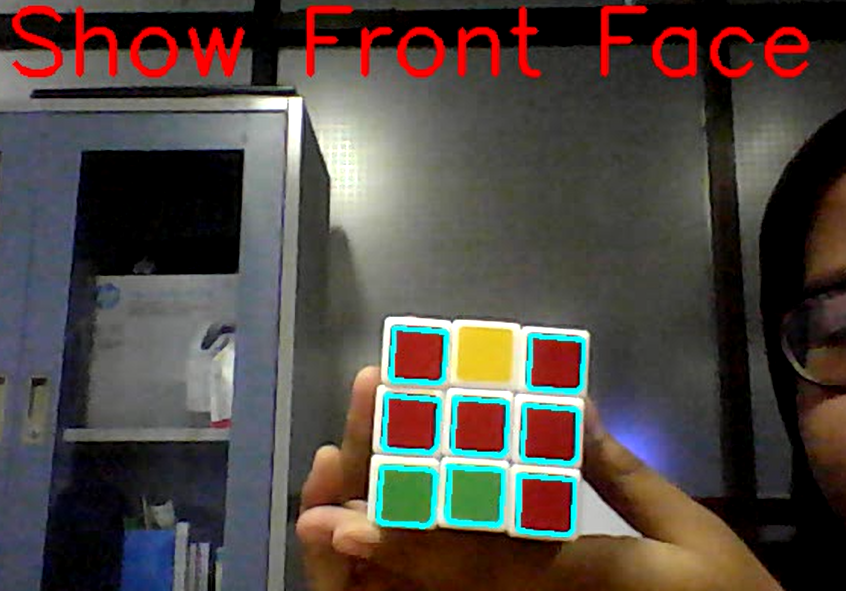

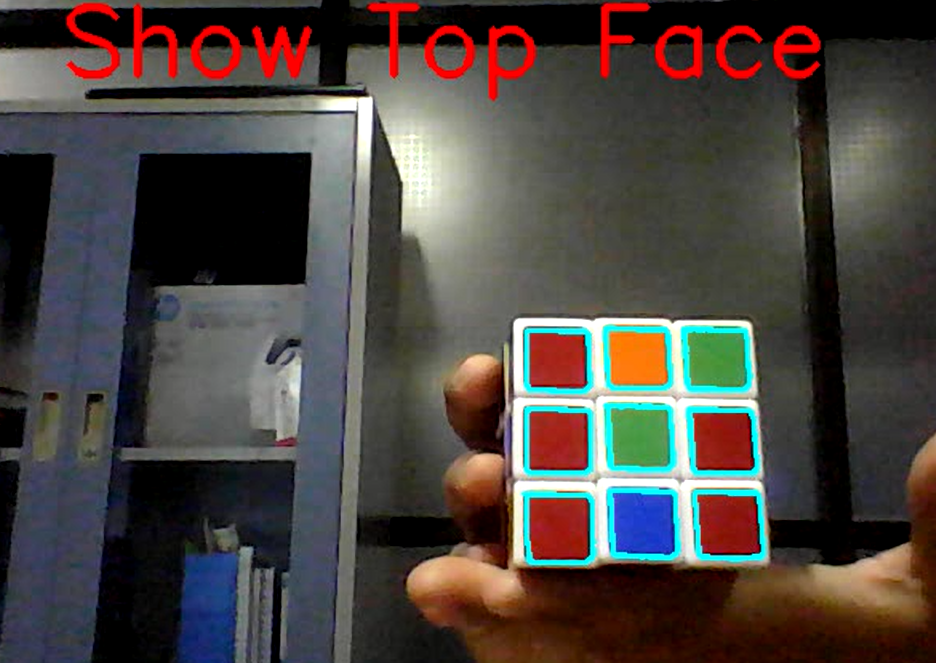